In [19]:
%matplotlib inline
#Imports
import pandas as pd
import numpy as np
from scipy.stats import beta

In [20]:
averageViewsPerListingPerDay = 0.85
averageViewsPerDay = 28.5

In [21]:
averageViewsPerListingPerDay/averageViewsPerDay

0.02982456140350877

In [37]:
priorScale = 7 #one week
priorAlpha = averageViewsPerListingPerDay * priorScale #average views per listing per day (success)
priorBeta = (averageViewsPerDay * priorScale) - priorAlpha #average total views per day minus average listing views (failures)

scale = 10 #scale to make graph pretty

listingViews = 13 #test, test listing had 12 views in 2 weeks
totalSiteViews = 540 #test assume we had 27 total listing views per day for 2 weeks

posteriorAlpha = priorAlpha + listingViews
posteriorBeta = priorBeta + (totalSiteViews - listingViews)

In [38]:
#test rate of total listing views
listingViews/totalSiteViews

0.024074074074074074

In [39]:
#assume 28.5 total views per day, this listing will get this number of views
#28.5 * (listingViews/totalViews)

In [40]:
#assume 27 total views per day, this listing will get this number of views
#27 * (listingViews/totalViews)

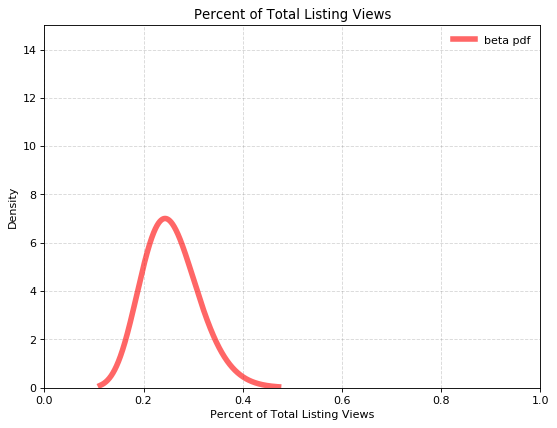

In [41]:
import matplotlib.pyplot as plt

#Plot pdf
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=80)
x = np.linspace(beta.ppf(0.001, posteriorAlpha, posteriorBeta, scale=scale),
              beta.ppf(0.999, posteriorAlpha, posteriorBeta, scale=scale), 1000)
ax.plot(x, beta.pdf(x, posteriorAlpha, posteriorBeta, scale=scale),
         'r-', lw=5, alpha=0.6, label='beta pdf')

#Make plot pretty
ax.legend(loc='best', frameon=False)
ax.set_xlim([0, 1])
ax.set_ylim([0, 15])
plt.title("Percent of Total Listing Views")
plt.ylabel('Density')
plt.xlabel('Percent of Total Listing Views')
plt.grid(b=True, which='major', color='gray', linestyle='--', alpha= 0.3)
plt.show()

In [29]:
ntrials = 10000
sample = beta.rvs(posteriorAlpha, posteriorBeta, scale=scale, size=ntrials)

In [30]:
(np.mean(sample)/scale)

0.053074050928079416

In [31]:
(np.quantile(sample, .025)/ scale)

0.04621525386093442

In [32]:
(np.quantile(sample, .975)/ scale)

0.06031772215585364

In [33]:
# Assuming 28.5 total listing views per day, this is what we can expect as views per day for this listing

In [34]:
(np.mean(sample)/scale) * averageViewsPerDay

1.5126104514502634

In [35]:
(np.quantile(sample, .025)/ scale) * averageViewsPerDay

1.317134735036631

In [36]:
(np.quantile(sample, .975)/ scale) * averageViewsPerDay

1.7190550814418288